# ML Foundation Project : Prudential Life Insurance Risk Prediction

<img src="https://github.com/rajgupta-github/MachineLearning-with-Python/blob/master/images/prudential.png?raw=true" />

# Table of Contents
- 1. [Problem Statement](#section1)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Preprocessing](#section3)</br>
    - 3.1 [Missing Values](#section301)<br/>
    - 3.2 [Correlation between Target and Features](#section302)<br/>
    - 3.3 [Handling Categorical Features](#section303)<br/>
- 4. [Model Development](#section4)</br>
    - 4.1 [Preparing X and y using pandas](#section401)<br/>
    - 4.2 [Splitting X and y into training and test datasets](#section402)<br/>
    - 4.3 [Logistic Regression](#section403)<br/>
    - 4.4 [Decision Tree Classifier](#section404)<br/>
    - 4.5 [Random Forest Classifier](#section405)<br/>
    - 4.6 [Auto ML using Base Models](#section406)<br/>
- 5. [Model Evaluation](#section5)</br>
    - 5.1 [Accuracy Scores using Base Models](#section501)<br/>
- 6. [Model Optimization using GridSearchCV/RandomizedSearchCV](#section6)<br/>
    - 6.1 [Classification Report](#section601)<br/>
    - 6.2 [Accuracy Scores after using Model Optimizations](#section602)<br/>

<a id=section1></a> 
# 1. Problem Statement

The goal is to develop a predictive model that accurately classifies risk using a more automated approach, which can greatly impact public perception of the insurance industry.

The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

<a id=section2></a> 
## 2. Load the packages and data
<section1>
<br/>

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import warnings
import pandas_profiling 
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 200)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from sklearn import model_selection

In [2]:
insurance_df = pd.read_csv('https://raw.githubusercontent.com/rajgupta-github/MachineLearning-with-Python/master/dataset/insurance_data.csv')


In [3]:
insurance_df.shape

(59381, 128)

In [4]:
insurance_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


Dataset mainly contains below information:
- Insurance Id
- Product Info
- Employment Info
- Insured Info
- Insurance History
- Family History
- Medical History
- Medical Keyword
- Insurance Age
- Height, Weight, BMI
- Response

<img src="https://github.com/rajgupta-github/MachineLearning-with-Python/blob/master/images/data.png?raw=true" />

In [5]:
print(insurance_df.Response.dtype)

int64


In [6]:
insurance_df.Response.unique()

array([8, 4, 1, 6, 2, 7, 3, 5])

In [26]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    print(mean_1)
    std_1 =np.std(data_1)
    print(std_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [17]:
insurance_df_conti_vars = insurance_df.loc[:, (insurance_df.dtypes == 'float64') | (insurance_df.dtypes == 'int64')]

In [21]:
insurance_df_conti_vars.drop('Id', axis=1, inplace=True)

In [22]:
insurance_df_conti_vars.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [30]:
outliers=[]
detect_outlier(insurance_df_conti_vars['Product_Info_3'])

24.415654839089946
5.072842707448531


[8,
 4,
 4,
 8,
 8,
 4,
 4,
 4,
 4,
 8,
 9,
 6,
 8,
 4,
 8,
 4,
 8,
 4,
 8,
 3,
 4,
 8,
 6,
 8,
 4,
 8,
 8,
 4,
 4,
 8,
 8,
 4,
 2,
 8,
 4,
 4,
 4,
 8,
 8,
 8,
 4,
 6,
 8,
 4,
 8,
 4,
 4,
 4,
 4,
 8,
 8,
 8,
 4,
 4,
 4,
 8,
 4,
 8,
 4,
 4,
 9,
 4,
 4,
 9,
 8,
 2,
 4,
 8,
 8,
 4,
 8,
 4,
 4,
 4,
 8,
 9,
 8,
 8,
 9,
 4,
 4,
 4,
 8,
 1,
 4,
 4,
 8,
 8,
 9,
 4,
 8,
 4,
 9,
 8,
 4,
 8,
 9,
 8,
 8,
 8,
 8,
 2,
 9,
 4,
 4,
 4,
 4,
 8,
 4,
 8,
 8,
 5,
 2,
 8,
 2,
 4,
 4,
 2,
 2,
 2,
 8,
 4,
 4,
 8,
 3,
 4,
 4,
 9,
 4,
 9,
 4,
 4]

In [ ]:
sns.lineplot(x="", y="target", data=data)

# Since Target Variable is Categorical Feature and have 8 unique values, its a Multi-Class Classification Problem

In [14]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


<a id=section3></a> 
# 3. Preprocessing

The following variables are all categorical (nominal):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

The following variables are continuous:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

The following variables are discrete:



Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

Medical_Keyword_1-48 are dummy variables.



<a id=section301></a> 
## 3.1 Missing Values

In [15]:
dataset_na = (insurance_df.isnull().sum() / len(insurance_df)) * 100
dataset_na = dataset_na.drop(dataset_na[dataset_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :dataset_na})
missing_data.head(20)

,Missing Ratio
Medical_History_10,99.061990
Medical_History_32,98.135767
Medical_History_24,93.598963
Medical_History_15,75.101463
Family_Hist_5,70.411411
Family_Hist_3,57.663226
Family_Hist_2,48.257860
Insurance_History_5,42.767889
Family_Hist_4,32.306630
Employment_Info_6,18.278574


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of missing values')

Text(0.5, 1.0, 'Percent missing data by feature')

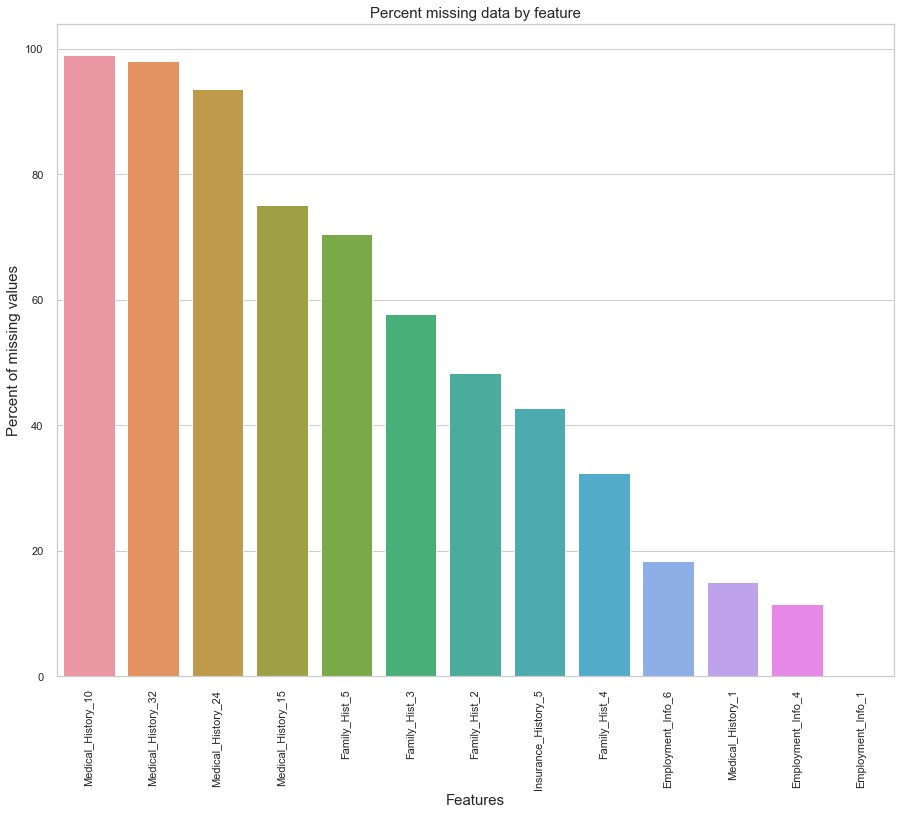

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=dataset_na.index, y=dataset_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### Dropping columns with more than 50% empty values 

In [17]:
insurance_df.drop(['Medical_History_10', 'Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3'], axis=1, inplace=True)



In [18]:
insurance_df['Family_Hist_2']=insurance_df['Family_Hist_2'].fillna(insurance_df['Family_Hist_2'].mean())

In [19]:
insurance_df['Family_Hist_4']=insurance_df['Family_Hist_4'].fillna(insurance_df['Family_Hist_4'].mean())

In [20]:
insurance_df['Insurance_History_5']=insurance_df['Insurance_History_5'].fillna(insurance_df['Insurance_History_5'].mean())

In [21]:
insurance_df['Employment_Info_6']=insurance_df['Employment_Info_6'].fillna(insurance_df['Employment_Info_6'].mean())

In [22]:
insurance_df['Medical_History_1']=insurance_df['Medical_History_1'].fillna(insurance_df['Medical_History_1'].mean())

In [23]:
insurance_df['Employment_Info_4']=insurance_df['Employment_Info_4'].fillna(insurance_df['Employment_Info_4'].mean())

In [24]:
insurance_df['Employment_Info_1']=insurance_df['Employment_Info_1'].fillna(insurance_df['Employment_Info_1'].mean())

In [25]:
dataset_na = (insurance_df.isnull().sum() / len(insurance_df)) * 100
dataset_na = dataset_na.drop(dataset_na[dataset_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :dataset_na})
missing_data.head(20)

,Missing Ratio


<a id=section302></a> 
## 3.2 Find Correlation

In [26]:
insurance_df.shape

(59381, 122)

In [27]:
insurance_df.columns.values

array(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3',
       'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6',
       'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4',
       'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_1', 'Insurance_History_2',
       'Insurance_History_3', 'Insurance_History_4',
       'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_4', 'Medical_History_1',
       'Medical_History_2', 'Medical_History_3', 'Medical_History_4',
       'Medical_History_5', 'Medical_History_6', 'Medical_History_7',
       'Medical_History_8', 'Medical_History_9', 'Medical_History_11',
       'Medical_History_12', 'Medical_Hist

In [28]:
corr = insurance_df.corr()

In [29]:
corr.Response.sort_values(ascending=False)

Response               1.000000
Medical_History_23     0.286584
Medical_History_4      0.239896
Medical_History_39     0.220176
Product_Info_4         0.202434
Medical_History_6      0.159230
Medical_History_13     0.134863
Medical_History_40     0.131519
InsuredInfo_6          0.130476
Medical_History_33     0.113112
Medical_History_1      0.095872
Medical_History_27     0.084595
InsuredInfo_1          0.083729
Employment_Info_2      0.078857
Medical_History_29     0.078089
Medical_History_20     0.077327
Medical_History_17     0.073633
Family_Hist_1          0.072107
Medical_History_9      0.067236
Employment_Info_5      0.054673
Medical_History_22     0.047906
Medical_History_31     0.046912
Medical_History_34     0.044429
Employment_Info_1      0.040833
Medical_History_11     0.036098
Medical_History_14     0.033373
Medical_History_37     0.031044
Medical_History_7      0.027073
InsuredInfo_4          0.022902
Medical_History_3      0.020316
Medical_History_2      0.016036
Employme

In [30]:
# corr['Response'].sort_values()[:-1].plot(kind='bar')

Dropping features which have almost zero correlation with Target Variable (Response)

In [31]:
insurance_df.drop(['Id', 'Insurance_History_4', 'Medical_History_25', 'Medical_History_36', 'Product_Info_5', 'Product_Info_7'], axis=1, inplace=True)



In [32]:
insurance_df.drop(['Medical_History_26', 'Insurance_History_1', 'Medical_Keyword_8', 'Medical_Keyword_45', 'Insurance_History_9', 'Medical_Keyword_17'], axis=1, inplace=True)


In [33]:
columns = ['Response', 'Medical_History_23', 'Medical_History_4', 'Medical_History_39', 'Product_Info_4', 'InsuredInfo_6', 'Wt', 'BMI', 'Medical_Keyword_15', 'Medical_Keyword_3', 'Ins_Age']
corr = corr.loc[columns,columns]

<Figure size 864x432 with 0 Axes>

Text(0.5, 1, 'Correlation between features')

(12, 0)

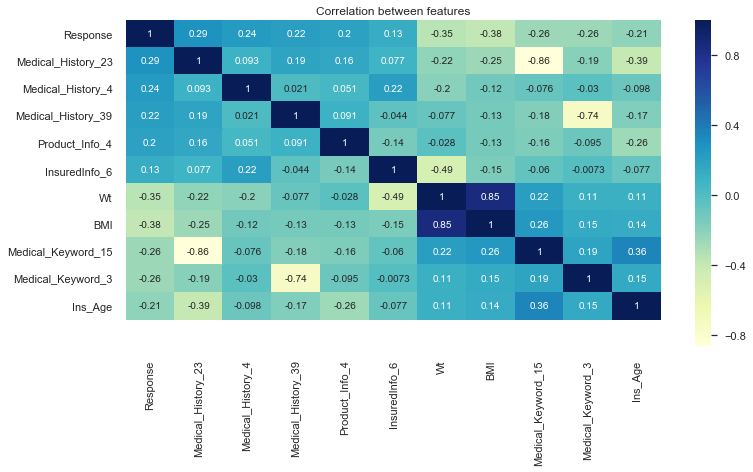

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')
plt.ylim(12,0)

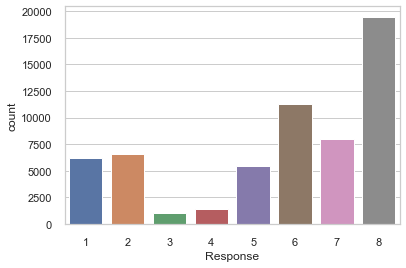

In [35]:
sns.countplot(x='Response',data=insurance_df)

<a id=section303></a> 
## 3.3 Handling Categorical Features 

In [36]:
insurance_df = pd.get_dummies(insurance_df)

In [37]:
insurance_df.shape

(59381, 128)

<a id=section4></a> 
# 4. Model Development

<a id=section401></a> 
## 4.1 Preparing X and y using pandas

In [38]:
X = insurance_df.loc[:,insurance_df.columns != 'Response']
X.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_6,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_2,Insurance_History_3,Insurance_History_5,Insurance_History_7,Insurance_History_8,Family_Hist_1,Family_Hist_2,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,1,10,0.076923,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,3,0.000667,1,1,2,0.474550,0.444890,4.000000,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,3,1,3,2,3,1,3,1,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,26,0.076923,3,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,1,3,0.000133,1,3,2,0.188406,0.084507,5.000000,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,3,1,3,2,3,3,1,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,3,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,1,1,0.001733,3,2,3,0.304348,0.225352,10.000000,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,3,1,3,2,3,3,3,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,3,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,1,1,0.001733,3,2,3,0.420290,0.352113,0.000000,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,3,1,3,2,3,3,3,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,26,0.230769,3,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,1,1,0.001733,3,2,2,0.463768,0.408451,7.962172,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,3,1,3,2,3,3,3,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
y = insurance_df["Response"]
y[:5]

0    8
1    4
2    8
3    8
4    8
Name: Response, dtype: int64

In [40]:
print(X.shape)
print(y.shape)

(59381, 127)
(59381,)


<a id=section402></a> 
## 4.2 Splitting X and y into training and test datasets.
 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [42]:
print(X_train.shape)
print(y_train.shape)

(47504, 127)
(47504,)


<a id=section403></a> 
## 4.3 Logistic Regression 

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred_train_lr = logreg.predict(X_train)

In [45]:
y_pred_test_lr = logreg.predict(X_test)

<a id=section404></a> 
## 4.4 Decision Tree Classifier

In [46]:
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [47]:
y_pred_train_dt = model.predict(X_train)  
y_pred_test_dt = model.predict(X_test)  

<a id=section405></a> 
## 4.5 Random Forest Classifier 

In [48]:
model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
y_pred_train_rf = model.predict(X_train)
y_pred_test_rf = model.predict(X_test)

<a id=section406></a> 
## 4.6 Auto ML using Base Models 


In [170]:
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    
    #Linear Model
    linear_model.LogisticRegression(),
    
    #Tree   
    tree.DecisionTreeClassifier()  
    ]

In [171]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%


In [188]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time', 'TrainTestDifference']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = insurance_df[["Response"]]  # Y 

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

In [181]:
Y = insurance_df["Response"].values.reshape(-1, 1)

In [191]:
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X, Y, cv  = cv_split,return_train_score=True,scoring='f1_weighted')

    
    # cv_result is a dictionary -> All the results of diff models are saved 
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    #MLA_compare.loc[row_index, 'TrainTestDifference'] = cv_results['train_score'].mean() - cv_results['test_score'].mean() 

    #save MLA predictions - see section 6 for usage
    alg.fit(X, Y)

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
      
    MLA_predict[MLA_name] = alg.predict(X)
    
    row_index+=1
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['TrainTestDifference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare   

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,TrainTestDifference
0,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_sam...",0.990164,0.458476,0.00890129,1.25922,NaN
1,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_st...",0.451554,0.44404,0.00528769,30.8677,NaN
2,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_s...",1,0.403007,0.00687021,1.33902,NaN


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,TrainTestDifference,Difference
0,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_sam...",0.990164,0.458476,0.00890129,1.25922,NaN,-53.1689
1,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_st...",0.451554,0.44404,0.00528769,30.8677,NaN,-0.751353
2,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_s...",1,0.403007,0.00687021,1.33902,NaN,-59.6993


In [193]:
MLA_predict[:5]


,Response,RandomForestClassifier,LogisticRegression,DecisionTreeClassifier
0,8,8,8,8
1,4,4,8,4
2,8,8,8,8
3,8,8,8,8
4,8,8,8,8


<a id=section5></a> 
# 5. Model Evaluation

In [50]:
# Accuracy for Logistic Regression

print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_lr))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_lr))

Accuracy score for train data is: 0.49277955540586055
Accuracy score for test data is: 0.47916140439504923


In [51]:
# Accuracy for Decision Tree

print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_dt))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_dt))

Accuracy score for train data is: 1.0
Accuracy score for test data is: 0.4033846931043193


In [52]:
# Accuracy for Random Forest

print('Accuracy score for train data:', accuracy_score(y_train,y_pred_train_rf))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_rf))

Accuracy score for train data: 0.9893693162681038
Accuracy score for test data using the model without parameter specification: 0.4848867559147933


In [68]:
# from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_lr))
confusion_matrix.index = ['Actual 1','Actual 2','Actual 3','Actual 4','Actual 5','Actual 6','Actual 7','Actual 8']
confusion_matrix.columns = ['Predicted 1','Predicted 2','Predicted 3','Predicted 4','Predicted 5','Predicted 6','Predicted 7','Predicted 8']
print(confusion_matrix)

          Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actual 1          319          176            4            8          105   
Actual 2          174          266            3            8          161   
Actual 3           10            7            0            9           27   
Actual 4           13            1            0           18            0   
Actual 5           55          117            3            0          317   
Actual 6          122          134            2           10           66   
Actual 7           51           32            0            5           27   
Actual 8           30           12            1            8           12   

          Predicted 6  Predicted 7  Predicted 8  
Actual 1          276          113          279  
Actual 2          323           98          293  
Actual 3          111            7           23  
Actual 4          116            5          130  
Actual 5          319           99          212  
Actual

<a id=section501></a> 
## 5.1 Accuracy Scores using Base Models 

- LR
    - Accuracy score for train data is: 0.49277955540586055
    - Accuracy score for test data is: 0.47916140439504923
- DT
    - Accuracy score for train data is: 1.0
    - Accuracy score for test data is: 0.4033846931043193
- RF
    - Accuracy score for train data: 0.9893693162681038
    - Accuracy score for test data using the model without parameter specification: 0.4848867559147933

<a id=section6></a> 
# 6. Model Optimization using GridSearchCV/RandomizedCV

In [58]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 0)
tree_para = [
                {'criterion':['gini','entropy'],
                 'max_depth': range(2,60),
                 'max_features': ['sqrt', 'log2', None] 
                }
            ]

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             pre_dispatch='2*n_jobs', refit='AUC', return_train_score=False,
             scoring=None, verbose=0)

In [59]:
y_pred_train_dt1 = grid_search.predict(X_train)
y_pred_test_dt1 = grid_search.predict(X_test)

In [72]:
# Accuracy for Decision Tree

print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_dt1))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_dt1))

Accuracy score for train data is: 0.5395545638262041
Accuracy score for test data is: 0.5193230613791362


<a id=section601></a> 
## 6.1 Classification Report

In [73]:
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8']
print(classification_report(y_train, y_pred_train_dt1, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.54      0.16      0.25      4927
     class 2       0.55      0.25      0.35      5226
     class 3       0.51      0.06      0.11       819
     class 4       0.34      0.09      0.14      1145
     class 5       0.60      0.51      0.55      4310
     class 6       0.40      0.57      0.47      9027
     class 7       0.44      0.36      0.40      6419
     class 8       0.64      0.88      0.74     15631

    accuracy                           0.54     47504
   macro avg       0.50      0.36      0.37     47504
weighted avg       0.53      0.54      0.50     47504



In [71]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt1))
confusion_matrix.index = ['Actual 1','Actual 2','Actual 3','Actual 4','Actual 5','Actual 6','Actual 7','Actual 8']
confusion_matrix.columns = ['Predicted 1','Predicted 2','Predicted 3','Predicted 4','Predicted 5','Predicted 6','Predicted 7','Predicted 8']
print(confusion_matrix)

          Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actual 1          143          164            4            7          121   
Actual 2           97          278            1            7          139   
Actual 3            6            6            9            7           52   
Actual 4            5            2            0           19            1   
Actual 5           37          102           11            3          539   
Actual 6           62           58            0           17           78   
Actual 7           19           18            0            4            5   
Actual 8            9           23            0           20            7   

          Predicted 6  Predicted 7  Predicted 8  
Actual 1          363          170          308  
Actual 2          367          130          307  
Actual 3           93            1           20  
Actual 4          154            6           96  
Actual 5          261           52          117  
Actual

In [113]:
# parameters for RandomizedSearchCV
# specify parameters and distributions to sample from

randomforest_classifier = RandomForestClassifier(random_state = 0)

param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(randomforest_classifier, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)
random_search.fit(X_train, y_train)

In [114]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None,
                                                    o...
                                        'max_depth': range(2, 5),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a27a25ed0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a28782e90>,
                                        'n_estimators': [100, 400, 700, 1000,
                                                         1500]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [119]:
y_pred_train_rf1 = random_search.predict(X_train)
y_pred_test_rf1 = random_search.predict(X_test)

In [120]:
# Accuracy for Random Forest

print('Accuracy score for train data:', accuracy_score(y_train,y_pred_train_rf1))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_rf1))

Accuracy score for train data: 0.4849065341865948
Accuracy score for test data using the model without parameter specification: 0.48606550475709354


<a id=section602></a> 
## 6.2 Accuracy Scores after using Model Optimizations 

- DT using GridSearchCV
    - Accuracy score for train data is: 0.5395545638262041
    - Accuracy score for test data is: 0.5193230613791362
- RF using RandomizedSearchCV    
    - Accuracy score for train data: 0.4849065341865948
    - Accuracy score for test data using the model without parameter specification: 0.48606550475709354